<h1>Time series analysis</h1>
<h3>Data 602: Week 03 Assignment</h3>
<h3>Submitted by: Srashti Soni</h3>

In [16]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

<h3>Importing the dataset</h3>

In [17]:
df=pd.read_csv('multiTimeline.csv')
df.head()

,Month,Diet,Gym,Finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


<h3>Checking the data information</h3>

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Month    168 non-null    object
 1   Diet     168 non-null    int64 
 2   Gym      168 non-null    int64 
 3   Finance  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


<h3>Conversion of 'Month' coulmn dataype to datetime </h3>

In [19]:
df['Month'] = pd.to_datetime(df['Month'])

<h3>Setting the Month column as the index of the dataframe</h3>

In [20]:
df.set_index('Month', inplace=True)
df.head()

,Diet,Gym,Finance
Month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


<h3>Data visualization using matplotlib</h3>

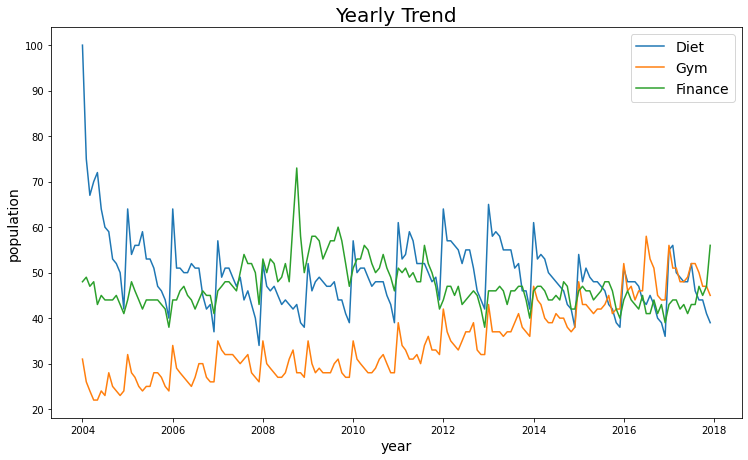

In [22]:
plt.rcParams["figure.figsize"] = [10.50, 6.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(df.Diet)
plt.plot(df.Gym)
plt.plot(df.Finance)
plt.xlabel('year', fontsize=14)
plt.ylabel('population', fontsize=14)
plt.legend(labels =['Diet', 'Gym', 'Finance'], fontsize=14)
plt.title('Yearly Trend', fontsize=20)
plt.show()

<h3>Rolling average of 'Diet' and its visualization.</h3>

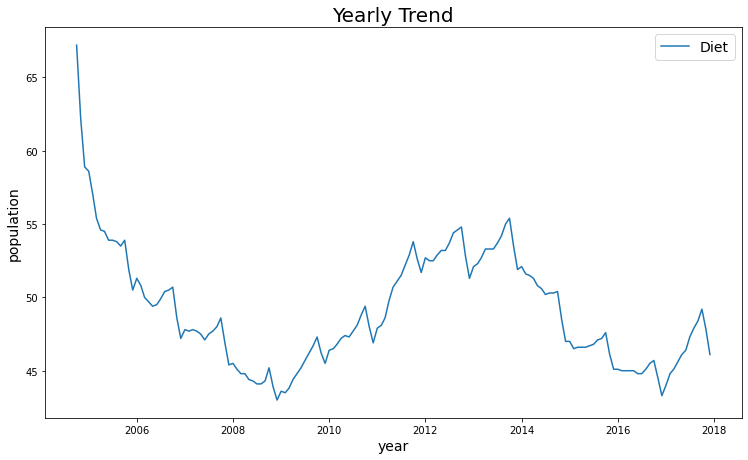

In [23]:
plt.rcParams["figure.figsize"] = [10.50, 6.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(df.Diet.rolling(10).mean())
plt.xlabel('year', fontsize=14)
plt.ylabel('population', fontsize=14)
plt.legend(labels =['Diet'], fontsize=14)
plt.title('Yearly Trend', fontsize=20)
plt.show()

<h3>Rolling average of 'Gym' and its visualization.</h3>

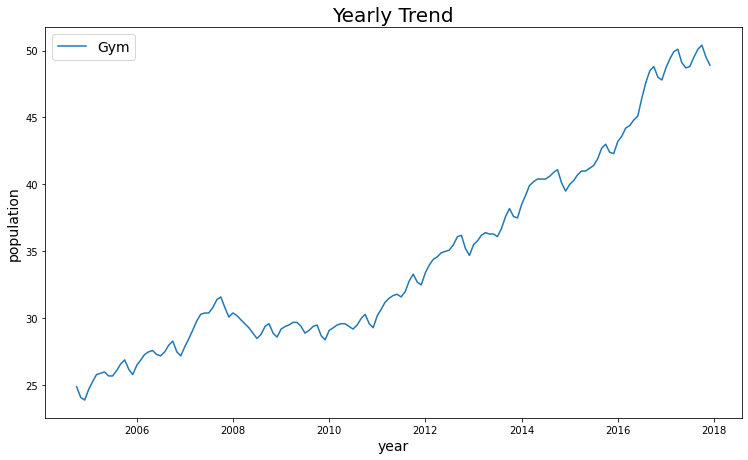

In [24]:
plt.rcParams["figure.figsize"] = [10.50, 6.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(df.Gym.rolling(10).mean())
plt.xlabel('year', fontsize=14)
plt.ylabel('population', fontsize=14)
plt.legend(labels =['Gym'], fontsize=14)
plt.title('Yearly Trend', fontsize=20)
plt.show()

<h3>Comparing 'Diet' and 'Gym' trends.</h3>

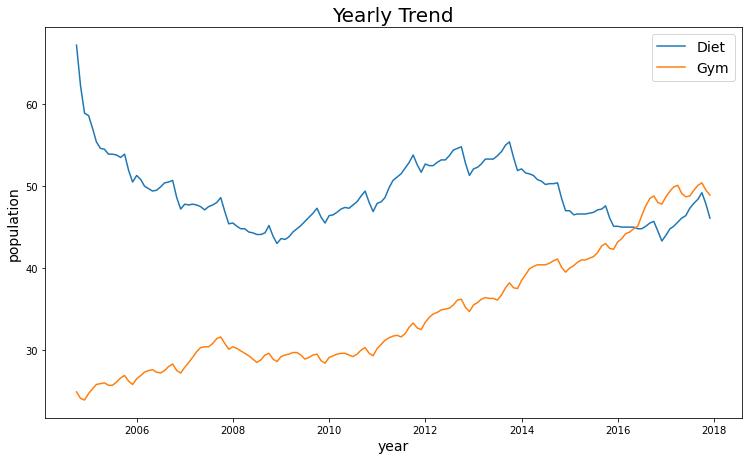

In [25]:
plt.rcParams["figure.figsize"] = [10.50, 6.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(df.Diet.rolling(10).mean())
plt.plot(df.Gym.rolling(10).mean())
plt.xlabel('year', fontsize=14)
plt.ylabel('population', fontsize=14)
plt.legend(labels =['Diet','Gym'], fontsize=14)
plt.title('Yearly Trend', fontsize=20)
plt.show()

<h3>Detrending using First Order Differencing</h3>

Text(0.5, 0, 'Year')

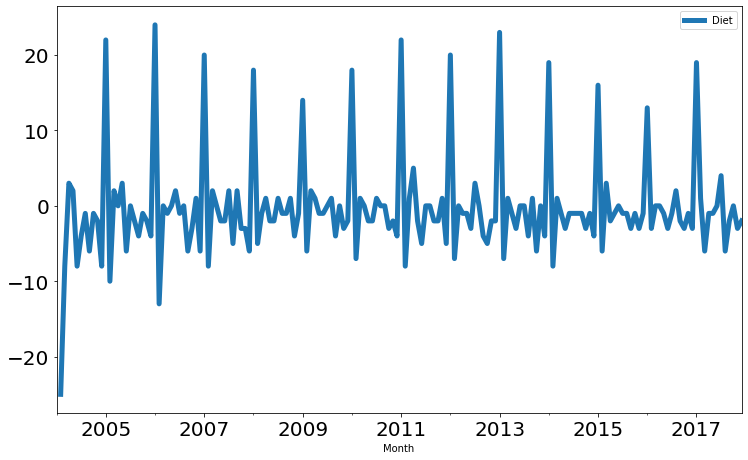

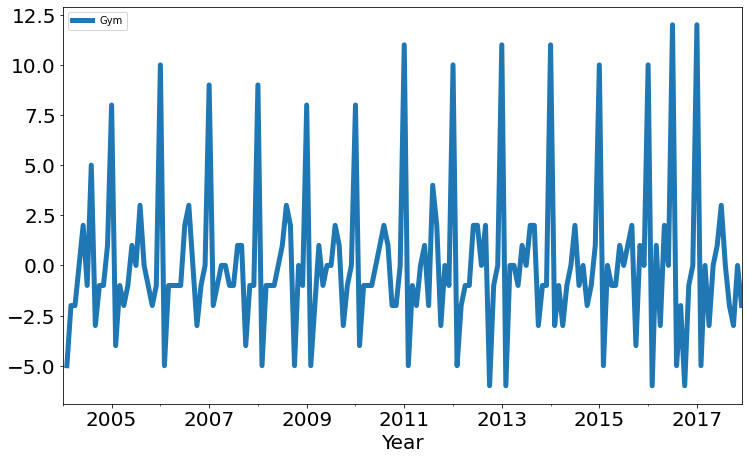

In [27]:
#Seasonal pattern of Diet and Gym  after removing trend
diet = df[['Diet']]
gym = df[['Gym']]
diet.diff().plot(figsize=(10.50,6.50), linewidth=5, fontsize=20)
gym.diff().plot(figsize=(10.50,6.50), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

<h3>Detrending for all columns</h3>

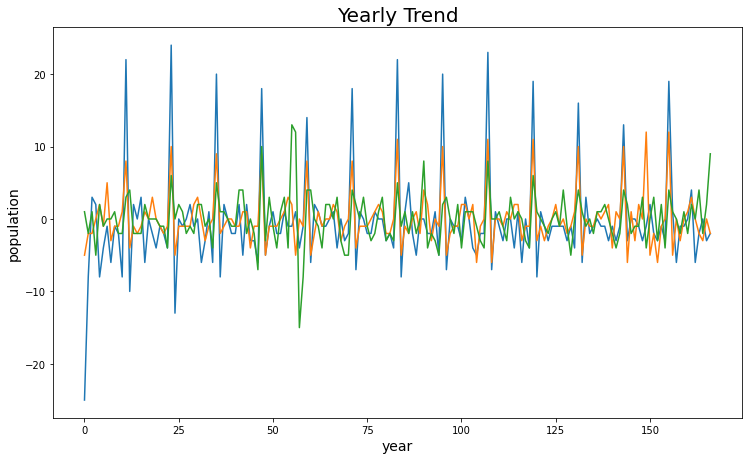

In [11]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
X = df.values
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
plt.xlabel('year', fontsize=14)
plt.ylabel('population', fontsize=14)
plt.title('Yearly Trend', fontsize=20)
plt.plot(diff)
plt.show()

<h3>Correlation</h3>

In [12]:
df.corr()

,Diet,Gym,Finance
Diet,1.000000,-0.100764,-0.034639
Gym,-0.100764,1.000000,-0.284279
Finance,-0.034639,-0.284279,1.000000


In [14]:
df.diff().corr() #  'diet' and 'gym' are highly correlated, with a coefficient of 0.76.

,Diet,Gym,Finance
Diet,1.000000,0.758707,0.373828
Gym,0.758707,1.000000,0.301111
Finance,0.373828,0.301111,1.000000


<h3>Autocorrelation</h3>

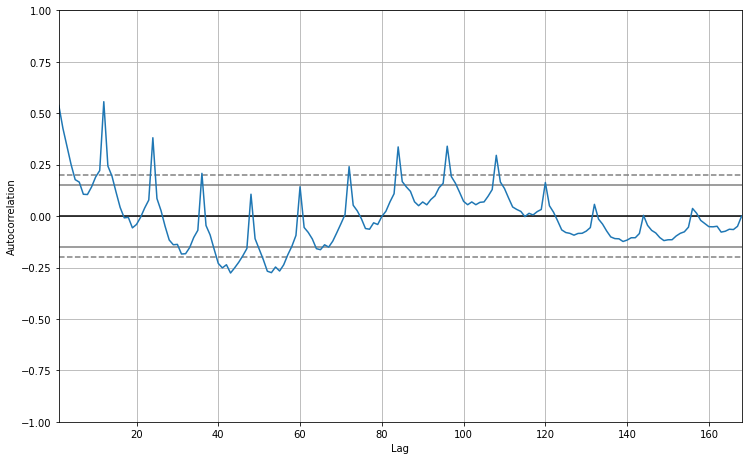

In [13]:
pd.plotting.autocorrelation_plot(diet);

<h3>What do the dotted lines represent?</h3>

The dotted line represents the correlation between the variables which shows that the data is highly correlated.

<h3>What is the seasonality?</h3>

Seasonality is when the data repeats a pattern in itself after a certain interval of time. 